<font size="+3"><b>Project: Principal Component Analysis and Clustering
</b></font>

***
* **Full Name** = Rohil Dhillon
***

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [ ]:
# Downloading the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzipping wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Removeing the downloaded zip file after extraction
!rm -r seeds.zip

--2024-04-09 20:24:16--  https://archive.ics.uci.edu/static/public/236/seeds.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seeds.zip’

seeds.zip               [ <=>                ]   9.21K  --.-KB/s    in 0.03s   

Last-modified header missing -- time-stamps turned off.
2024-04-09 20:24:17 (272 KB/s) - ‘seeds.zip’ saved [9432]

Archive:  seeds.zip
 extracting: seeds_dataset.txt       


In [ ]:
# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']

data

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## Performing Principle Component Analysis (PCA)

### **Preprocessing the Data**

In this project, I began by splitting the dataset into two separate dataframes: X, which contains the seven feature variables, and y, which holds the target variable. To ensure the model is well-evaluated, I performed a stratified split of the data into training and test sets, with 80% of the data allocated for training and 20% for testing. This stratified split helps maintain the representative distribution of classes in both the training and test sets. Finally, I visualized the proportions of the training and test sets using a pie chart to confirm the split, displaying both the percentage and the number of entries for each set.

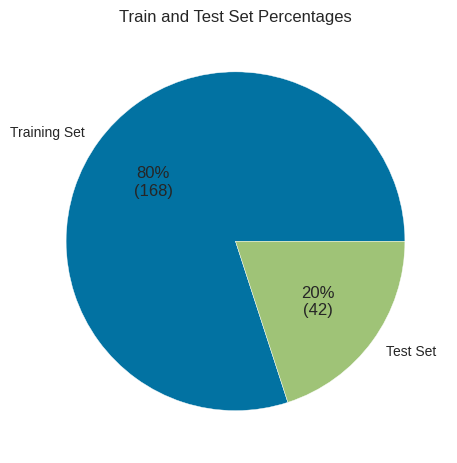

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = data.drop('Type', axis=1)
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

train_size = len(y_train)
test_size = len(y_test)
total_size = train_size + test_size

train_proportion = train_size / total_size
test_proportion = test_size / total_size

sizes = [train_size, test_size]
labels = ['Training Set', 'Test Set']

percentages = [train_proportion * 100, test_proportion * 100]

plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}%\n({:.0f})'.format(p, p * total_size / 100))
plt.title('Train and Test Set Percentages')

plt.show()

### **Scaling the Data**

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

The scaler I'm choosing is the robust scaler since my dataset contains outliers which is visible from the boxplot below.

Justification:

The robust scaler scales features using the median and the IQR (Inter-Quartile Range), making it resistant to outliers.
Though gradient boosting decision trees are inherently resistant to outliers, in some cases where outliers may dominate the feature, they could influence the model. Therefore, using a scaling method that nullifies that risk is ideal, especially since we are required to use a scaler.
Additionally, scaling can help with numerical stability and the speed of convergence. This is a situation in which scaling can aid with potential issues in convergence or time to convergence.


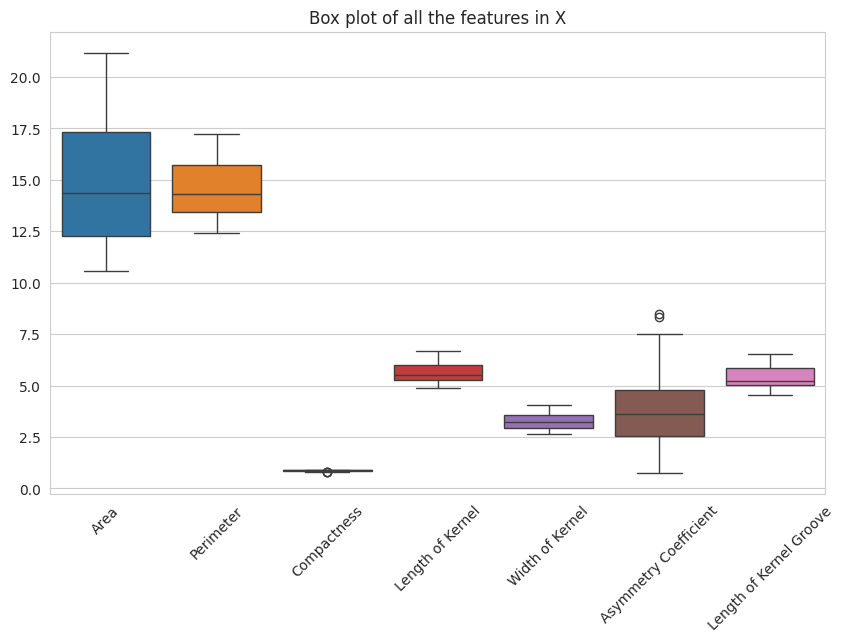

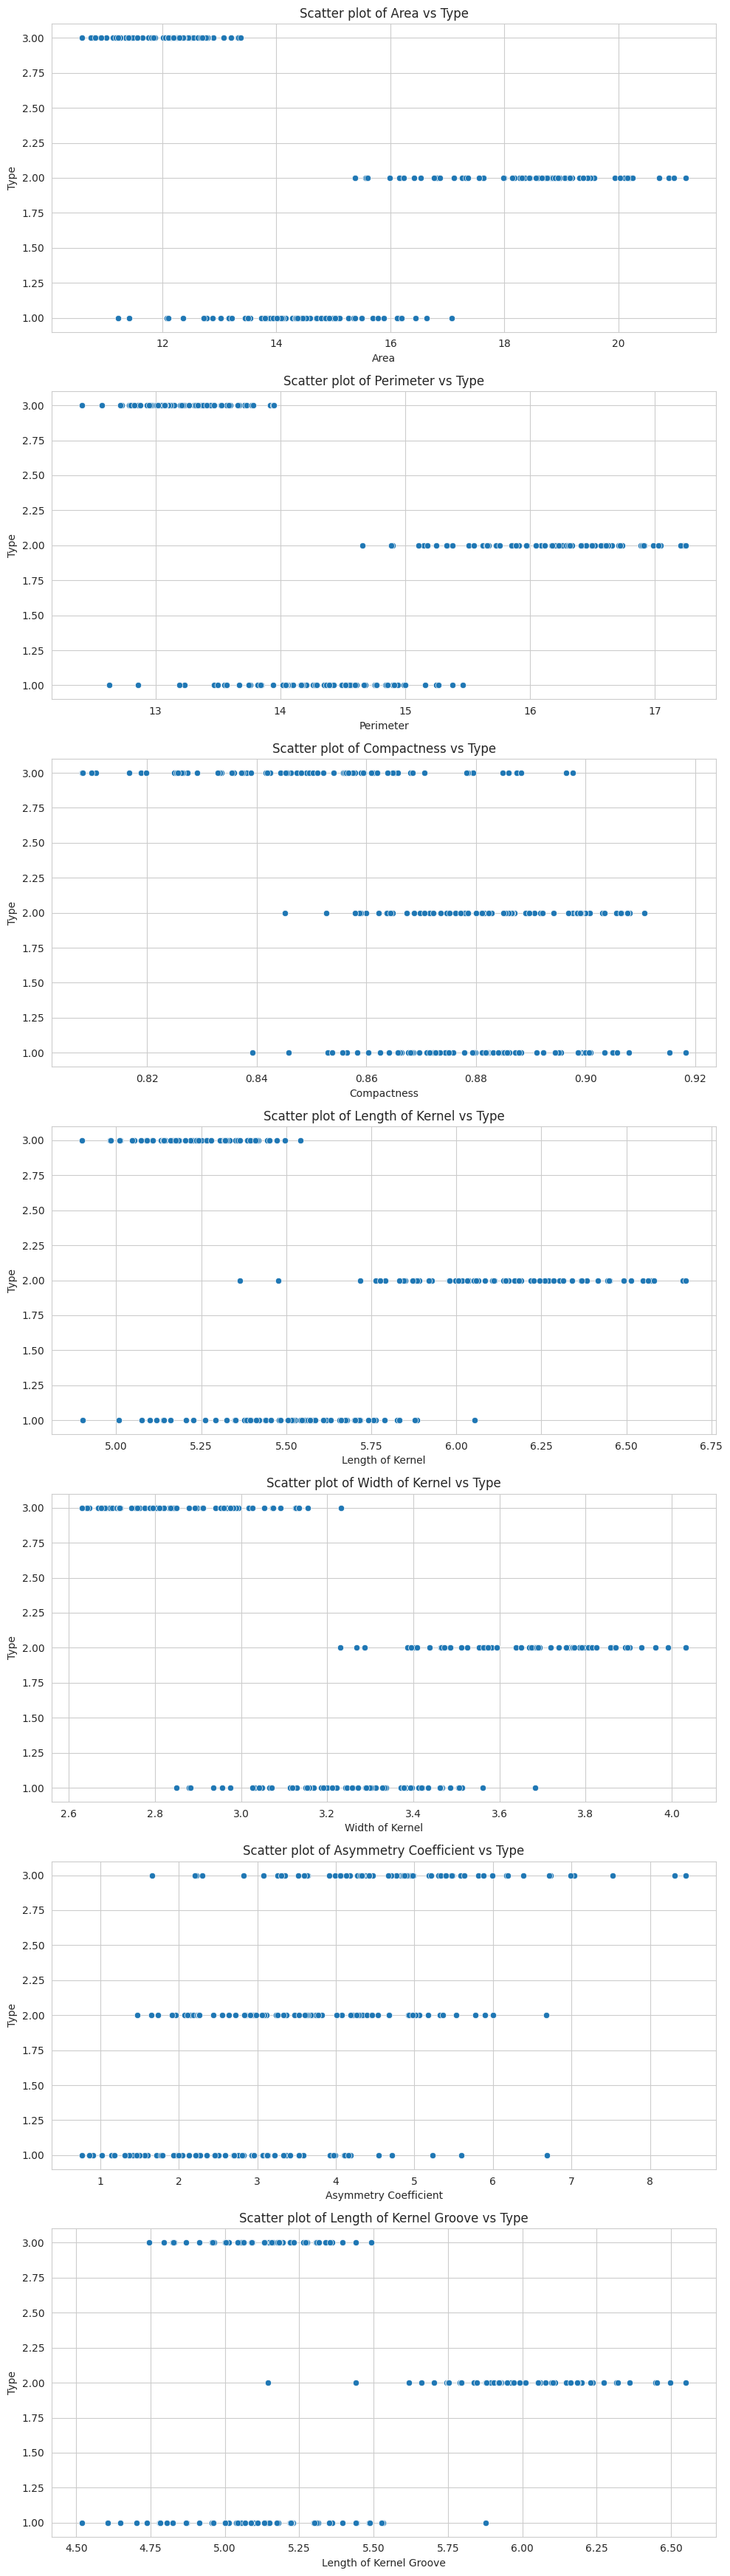

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Using boxplots to look at outliers in the data
# Using scatterplots to determine whether there are linear relationships or non-linear relationships present.

#Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title('Box plot of all the features in X')
plt.xticks(rotation=45)
plt.show()

#Scatterplots
num_features = X.shape[1]

fig, axs = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

for i, feature in enumerate(X.columns):
    sns.scatterplot(x=X[feature], y=y, ax=axs[i])
    axs[i].set_title(f'Scatter plot of {feature} vs Type')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Type')

plt.tight_layout()
plt.show()

### **Model Selection & Reasoning**

In this project, I chose the Gradient Boosting classifier as the ideal choice for the dataset. In a multiclass classification problem, a linear relationship refers to whether or not a decision boundary between classes (Types in this case) can be described by a linear function. Using a linear classifier is ideal in cases where there is a linear relationship, meaning we can separate the classes in the feature space with a linear equation or hyperplanes, or where complex boundaries are not present. Essentially, in the scatterplots, we are looking for what values of the feature we can use as boundaries to determine whether to classify a seed as Type 1, 2, or 3. Since, in several features, there are no clear boundaries that can be made down to the x-axis, we can infer that there are complex boundaries and hence non-linear relationships present.

In the scatterplots generated for each feature in the dataset vs. the target variable (Type), we can see that although there is some separability, there is also significant overlap, implying there are non-linear relationships present. The gradient boosting classifier model excels at handling complex non-linear relationships between classes and the target variable. Gradient Boosting Decision Trees (GBDTs) are also great for deriving insights such as feature importance, which can be useful in understanding and explaining the decisions our model makes. As GBDT is an ensemble model, it combines the predictions of several base estimators, which reduces the risk of errors from any single tree, leading to improved generalization and overall better results.

### **Parameter Grid Search**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Setting up the pipeline with RobustScaler and GradientBoostingClassifier
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('gbdt', GradientBoostingClassifier(random_state=50))
])

param_grid = {
    'gbdt__n_estimators': [100, 200],
    'gbdt__learning_rate': [0.01, 0.1],
    'gbdt__max_depth': [3, 4],
    'gbdt__min_samples_split': [2, 5],
    'gbdt__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best estimator found: ", grid_search.best_estimator_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate and print popular metrics for multiclass classification
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Best parameters found:  {'gbdt__learning_rate': 0.01, 'gbdt__max_depth': 3, 'gbdt__min_samples_leaf': 1, 'gbdt__min_samples_split': 2, 'gbdt__n_estimators': 100}
Best estimator found:  Pipeline(steps=[('scaler', RobustScaler()),
                ('gbdt',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            random_state=50))])
Accuracy: 0.9523809523809523
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       1.00      0.93      0.96        14
           3       0.94      1.00      0.97        17

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42





- Above, I've set up a pipeline in which I'm first using the robust scaler from sklearn to scale the data as we've determined the presence of outliers in certain features of the seeds dataset.
* After scaling the data I'm determining using GridSearchCV which hyperparameters to instantiate my gradient boosting decision tree classifier in order to get the best performance. Its accuracy as the scoring metric in this case. I determined which hyperparameters to use in the parameter grid
from the sklearn documentation for the gradient boosting classifier.

* After the ideal hyperparameters have been chosen I'm printing out the Accuracy of the model on the test data and the entire classification report using sklearn to be able to judge how well the model is performing overall in this multiclass classification problem.

References:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

### **Dimensionality Reducation & Model Optimization**

In [ ]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

tsne = TSNE(n_components=2, random_state=42)
X_transformed = tsne.fit_transform(X)

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

gbdt = GradientBoostingClassifier(random_state=50)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(gbdt, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_reduced, y_train_reduced)

print("Best parameters found: ", grid_search.best_params_)
print("Best estimator found: ", grid_search.best_estimator_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test_reduced, predictions)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test_reduced, predictions))

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator found:  GradientBoostingClassifier(learning_rate=0.01, random_state=50)
Accuracy: 0.9523809523809523
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       1.00      0.93      0.96        14
           3       0.94      1.00      0.97        17

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



- Chose t-SNE for dimensionality reduction of the seeds dataset as t-sne is adept as capturing non-linear relationships in the data unlike PCA. Also, since I have determined there are outliers present t-SNE is less sensitive to outliers as compared to PCA.

* Considering the performance of the gradient boosting classifier on the data before dimension reductiona using t-SNE and after we observe first that it determines the same hyperparameters are ideal in both cases. Furthermore, we have exactly the same performance metrics down to several decimal values. This is most likely due to the following reason:

1.   The gradient boosting decision tree classifier is already robust to outliers and after the data has been scaled using the robust scaler it is likely that the gradient boosting classifier is already performing at its maximum ability given the accuracy score even before reducing the dimensionality of the dataset was upwards of 95%.



### **Visualizing Reduced Dimensionality Data**

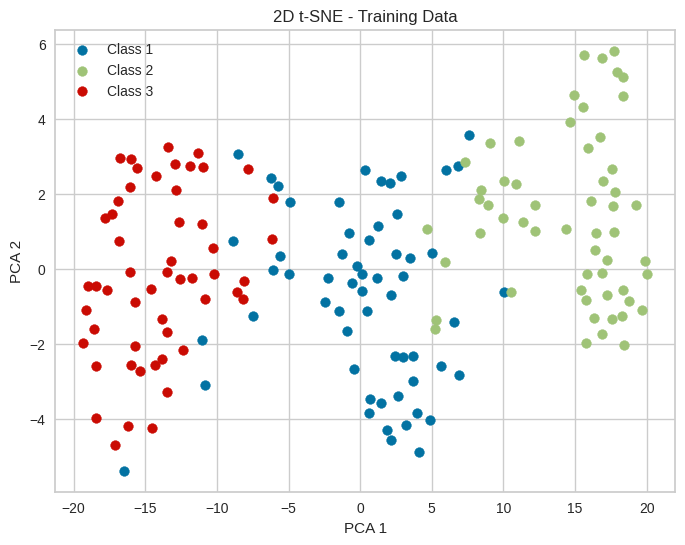

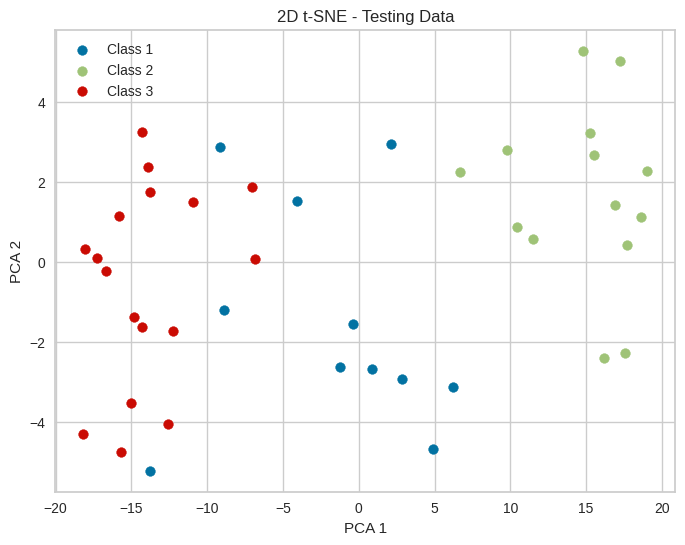

In [ ]:
# 1.6
# Add necessary code here.
plt.figure(figsize=(8, 6))
for class_index in range(1,4):
    plt.scatter(X_train_reduced[y_train_reduced == class_index, 0], X_train_reduced[y_train_reduced == class_index, 1],
                label=f'Class {class_index}')
plt.title('2D t-SNE - Training Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Scatter plot for testing data
plt.figure(figsize=(8, 6))
for class_index in range(1,4):
    plt.scatter(X_test_reduced[y_test_reduced == class_index, 0], X_test_reduced[y_test_reduced == class_index, 1],
                label=f'Class {class_index}')
plt.title('2D t-SNE - Testing Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## Clustering and Visualization of the Seeds Dataset

### Pipeline for Scaling and K-Means Clustering

- Includes a scaler and the K-Means clustering algorithm.
- Utilizing the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Results of the `KelbowVisualizer` below.

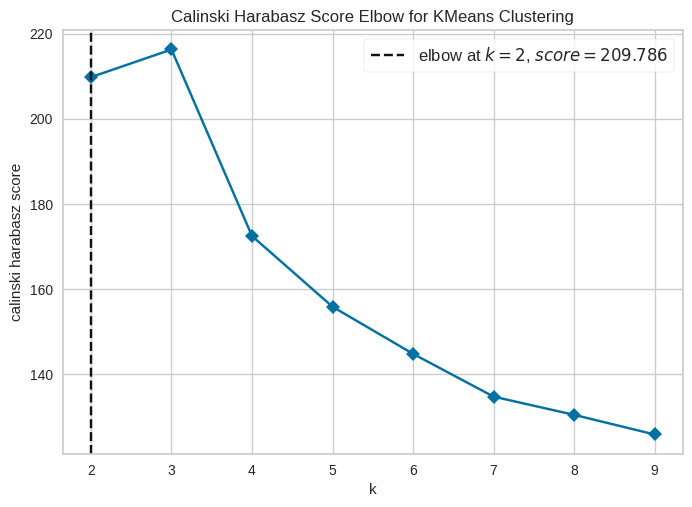

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('kmeans', KMeans(n_init=10, random_state=42))
])

visualizer = KElbowVisualizer(
    pipeline.named_steps['kmeans'], k=(2,10), metric='calinski_harabasz', timings=False
)

visualizer.fit(pipeline.named_steps['scaler'].fit_transform(X))

visualizer.show()

- Though the KElbowVisualizer is indicating that the elbow should at k = 2 on further analysis the highest Calinski Harabaz score is at k = 3.
- Therefore the estimated number of clusters based on the validation metric i.e. the Calinski Harabaz score should be 3.

### Labeling the Data Using the Optimal Number of Clusters
- Labeling training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found earlier.

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

X = data.drop('Type', axis=1).values

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('kmeans', KMeans(n_clusters=3, n_init=10, random_state=42))
])

pipeline.fit(X)

labels = pipeline.named_steps['kmeans'].labels_

feature_names = data.columns.drop('Type').tolist()
X_df = pd.DataFrame(X, columns=feature_names)

X_df['Cluster_Labels'] = labels

print(X_df.nunique())

X_df

Area                       193
Perimeter                  170
Compactness                186
Length of Kernel           188
Width of Kernel            184
Asymmetry Coefficient      207
Length of Kernel Groove    148
Cluster_Labels               3
dtype: int64


,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Cluster_Labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,0


### Dimensionality Reduction Using PCA
- Applying PCA to reduce the dimensionality of the dataset to 2D.

In [ ]:
# 2.3
# Add necessary code here.
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

X = data.drop('Type', axis=1).values

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=2, random_state=42))
])

X_pca = pipeline.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PCA 1', 'PCA 2'])

pca_df

,PCA 1,PCA 2
0,0.222314,0.451988
1,0.132084,1.217733
2,-0.028215,1.368021
3,-0.139683,1.337110
4,0.881124,1.364596
...,...,...
205,-1.080211,0.696041
206,-1.675987,-0.056040
207,-0.798936,-0.641682
208,-1.436453,0.116253


#### Plotting the 2D Data with Cluster Labels
- 2D scatter plot of the PCA-reduced data below.
- Colored the points using the labels obtained from K-Means clustering.

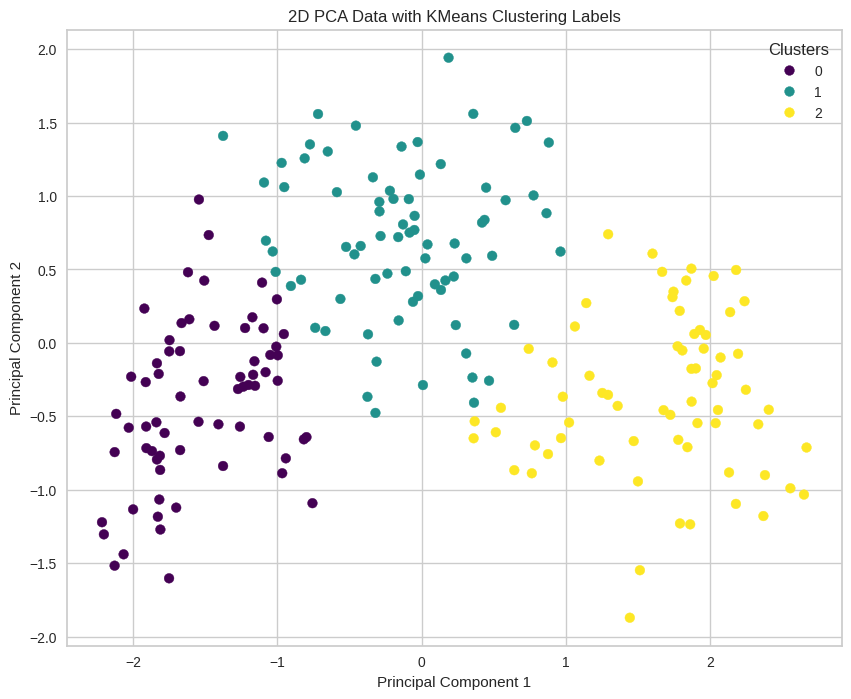

In [ ]:
# 2.4
# Add necessary code here.

import matplotlib.pyplot as plt

pca_df['Cluster_Labels'] = labels

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PCA 1'], pca_df['PCA 2'], c=pca_df['Cluster_Labels'], cmap='viridis')

plt.title('2D PCA Data with KMeans Clustering Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(handles=scatter.legend_elements()[0], labels=set(labels), title="Clusters")

plt.show()

## Interpretation of Clustering Results

- All three clusters have similar distinctions between them with no particular cluster being more distinct from the other among the three.

- It seems principial component 1 explains more of the variance in the reduced dataset than principal component 2 as it is observable that it is easier to divide the clusters or their data points on the x-axis than it is the y-axis. The data point show significant more overlap when looked at from the y-axis.

- Overall, it is fairly easy to draw boundaries between all three groupings.